# Grid 3DCORE

This notebook shows how to extract magnetic field values from the 3DCORE model on a spatial and temporal grid.

Timestep 11/70


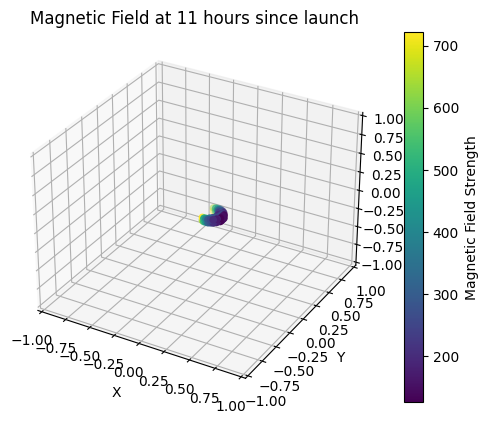

Timestep 12/70


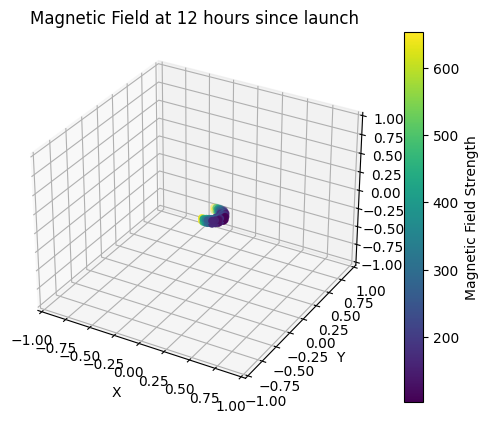

Timestep 13/70


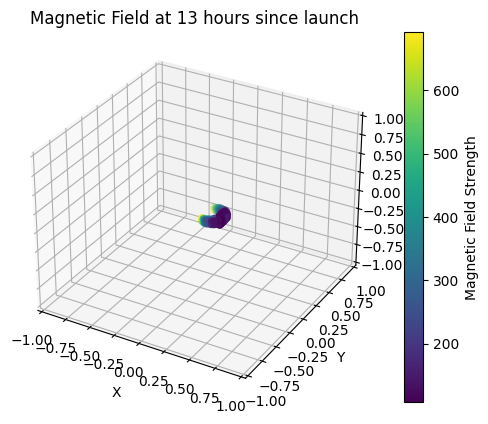

Timestep 14/70


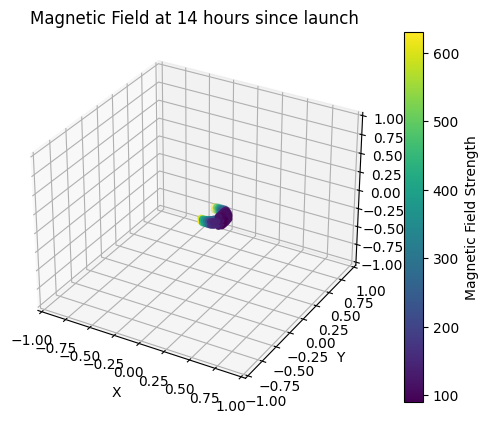

Timestep 15/70


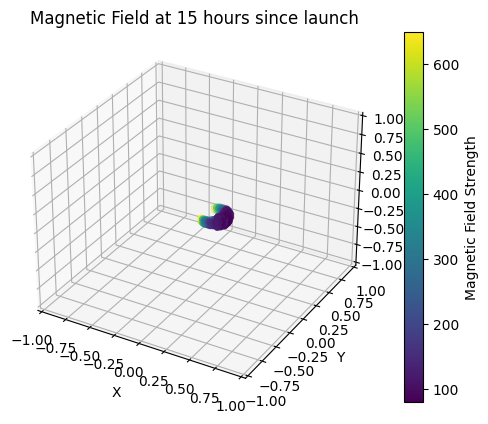

Timestep 16/70


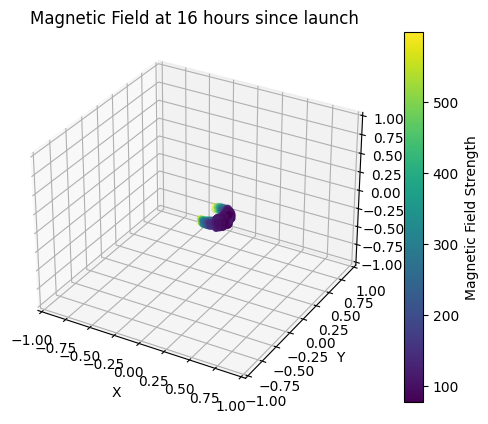

Timestep 17/70


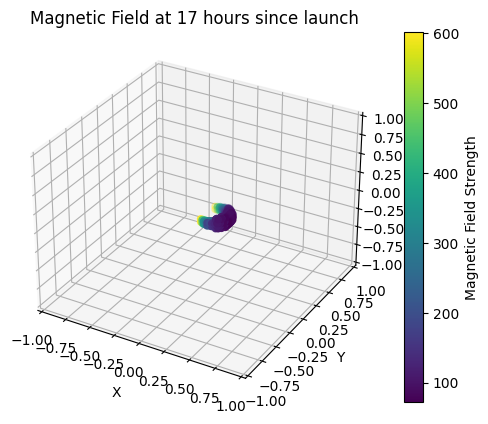

Timestep 18/70


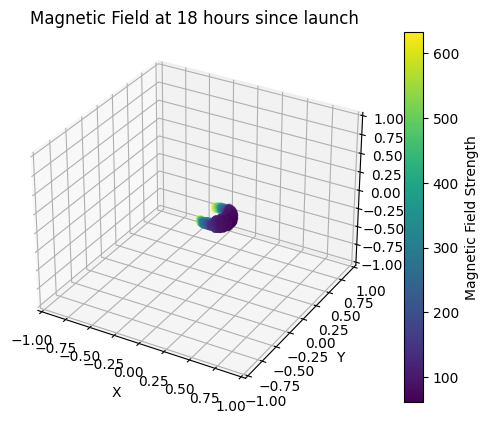

Timestep 19/70


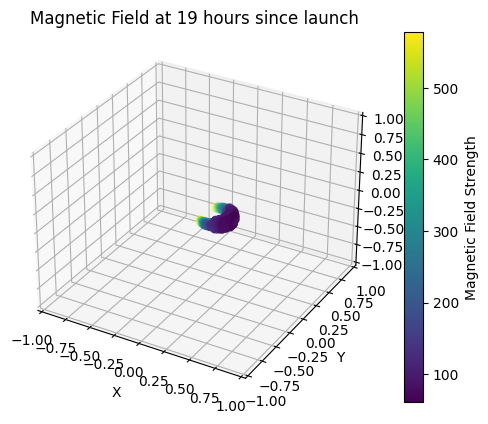

Timestep 20/70


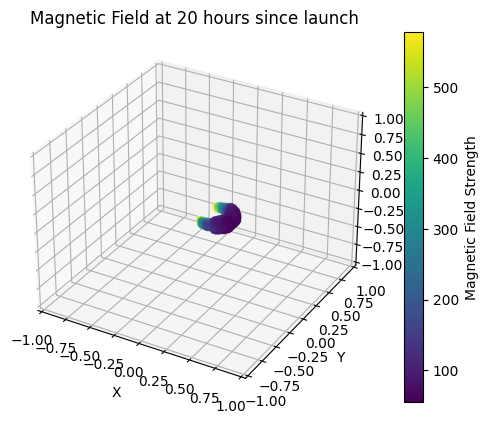

Timestep 21/70


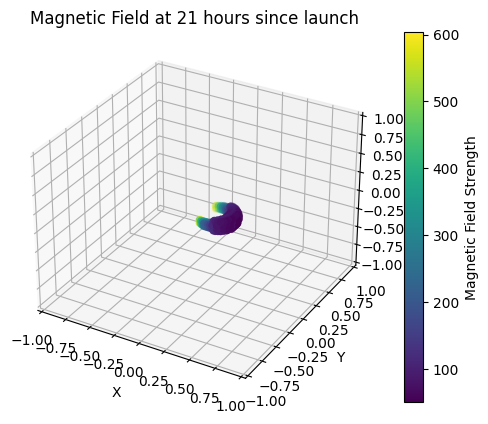

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import coreweb


# setup model


iparams = {
    "ensemble_size": int(1),  # 2**17
    "iparams": {
        "cme_longitude": {"distribution": "fixed", "default_value": 0},
        "cme_latitude": {"distribution": "fixed", "default_value": 0},
        "cme_inclination": {"distribution": "fixed", "default_value": 0},
        "cme_diameter_1au": {"distribution": "fixed", "default_value": 0.3},
        "cme_aspect_ratio": {"distribution": "fixed", "default_value": 2.0},
        "cme_launch_radius": {"distribution": "fixed", "default_value": 20},
        "cme_launch_velocity": {"distribution": "fixed", "default_value": 600},
        "t_factor": {"distribution": "fixed", "default_value": 50},
        "cme_expansion_rate": {"distribution": "fixed", "default_value": 1.14},
        "magnetic_decay_rate": {"distribution": "fixed", "default_value": 1.64},
        "magnetic_field_strength_1au": {"distribution": "fixed", "default_value": 25},
        "background_drag": {"distribution": "fixed", "default_value": 1},
        "background_velocity": {"distribution": "fixed", "default_value": 500},
    }
}

model_obj = coreweb.ToroidalModel(dt.datetime.now(), **iparams)  # Model gets initialized
model_obj.generator()



# Visualize shape 72 hours after launch
#model_obj.propagator(dt.datetime.now() + dt.timedelta(hours=72))

#ax = plt.figure().add_subplot(projection='3d')
#wf = model_obj.visualize_shape()

#ax.plot_wireframe(*wf.T, alpha=0.1)

#plt.show()



# Define grid resolution parameters
res1, res2, res3 = 50, 100, 50  # You can adjust these values as needed
num_timesteps = 70
start_timestep = 10  # Starting timestep, can be adjusted as needed

# Create the grid
x = np.linspace(0, 1, res1)
y = np.linspace(-0.5, 0.5, res2)
z = np.linspace(-1, 1, res3)
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')

# Prepare an array to store the magnetic field results
# Shape: (num_timesteps, res1, res2, res3, 3)
magnetic_field = np.zeros((num_timesteps, res1, res2, res3, 3))

# Simulate magnetic field
for i in range(start_timestep, start_timestep + num_timesteps):
    model_obj.propagator(dt.datetime.now() + dt.timedelta(hours=i))
    for xi in range(res1):
        for yi in range(res2):
            for zi in range(res3):
                pos = np.array([grid_x[xi, yi, zi], grid_y[xi, yi, zi], grid_z[xi, yi, zi]])
                out = np.zeros(3)
                model_obj.simulator_mag(pos, out)
                magnetic_field[i - start_timestep, xi, yi, zi] = out

    # Print progress
    print(f"Timestep {i+1}/{num_timesteps}")

    # Plot 3D point cloud for the current timestep
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Compute the magnitude of the magnetic field
    mag_magnitude = np.linalg.norm(magnetic_field[i - start_timestep], axis=-1)
    
    # Filter out points with zero magnetic field
    mask = mag_magnitude > 0
    
    # Plot the points with non-zero magnetic field
    sc = ax.scatter(grid_x[mask], grid_y[mask], grid_z[mask], c=mag_magnitude[mask], cmap='viridis')
    plt.colorbar(sc, label='Magnetic Field Strength')

    # Set the axis limits to keep the range -1 to 1
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Magnetic Field at {i+1} hours since launch')
    plt.show()